# Housing Prices

## Imports

In [61]:
import datacleaning as dc
import linregvis as lrv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyRegressor
from statsmodels.graphics.regressionplots import abline_plot
%matplotlib inline
sns.set_style('darkgrid')

## Getting the Data

In [62]:
df = dc.test_split(
    dc.get_data('data/kc_house_data.csv')
)
X_train = dc.clean_it(df[0])
X_test = dc.clean_it(df[1])
y_train = df[2]
y_test = df[3]

## Model #1

In [63]:
formula = "price ~ sqft_living"
model_1 = lrv.run_lr(formula, X_train, y_train)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 1.655e+04
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:05:19   Log-Likelihood:            -2.4032e+05
No. Observations:               17277   AIC:                         4.806e+05
Df Residuals:                   17275   BIC:                         4.807e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -4.57e+04   4993.714     -9.152      0.000   -5.55e+04   -3.59e+04
sqft_living   281.6056      2.189    128.634      0.000     277.315     285.897
==============================================================================
Omnibus:                    12287.594   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           502138.509
Skew:                           2.943   Prob(JB):                         0.00
Kurtosis:                      28.747   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

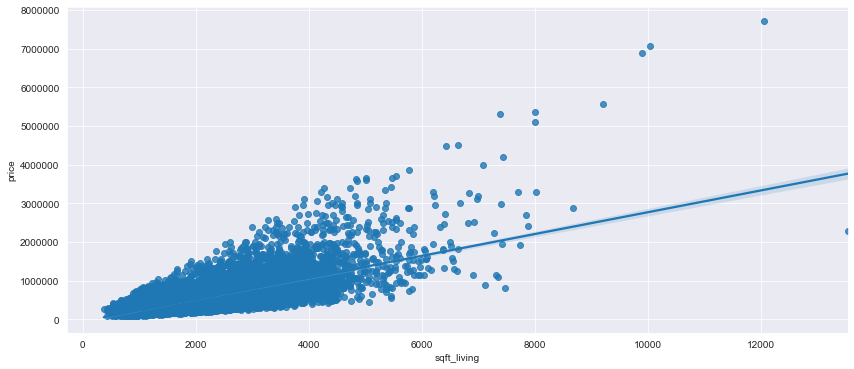

In [67]:
fig, ax = plt.subplots(figsize = (14,6))
sns.regplot(x = X_train.sqft_living, y = y_train, ax=ax);

### Validation

## Model #2

In [65]:
formula = "price ~ sqft_living + condition_2 + condition_3 + condition_4 + condition_5"
model_2 = lrv.run_lr(formula, X_train, y_train)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     3396.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:05:20   Log-Likelihood:            -2.4021e+05
No. Observations:               17277   AIC:                         4.804e+05
Df Residuals:                   17271   BIC:                         4.805e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept        2e+04   5.77e+04      0.347      0.729   -9.31e+04    1.33e+05
sqft_living   283.7182      2.192    129.451      0.000     279.422     288.014
condition_2 -9.774e+04   6.19e+04     -1.578      0.114   -2.19e+05    2.36e+04
condition_3  -8.75e+04   5.78e+04     -1.515      0.130   -2.01e+05    2.57e+04
condition_4 -5.305e+04   5.78e+04     -0.918      0.359   -1.66e+05    6.03e+04
condition_5  1.868e+04   5.81e+04      0.321      0.748   -9.53e+04    1.33e+05
==============================================================================
Omnibus:                    12317.028   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           513085.522
Skew:                           2.947   Prob(JB):                         0.00
Kurtosis:                      29.038   Cond. No.                     1.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Validation

## Model #3

### Validation